In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# EDA

## Loading and cleaning

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values=' ')
df.shape

(7043, 21)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
pd.isna(df).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
df = df.fillna(0)
df.shape

(7043, 21)

In [6]:
np.sum(df.duplicated())

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Data exploration

In [9]:
print('proportion of non churners:', len(df[df.Churn=='No'])/len(df))

proportion of non churners: 0.7346301292063041


[]

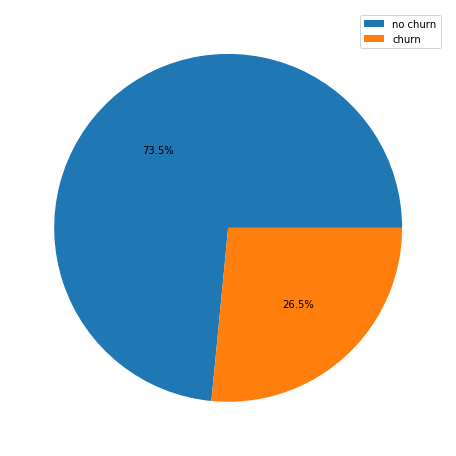

In [10]:
plt.figure(figsize=(8,8))
plt.pie([len(df[df['Churn']=='No']), len(df[df['Churn']=='Yes'])], autopct='%1.1f%%')
plt.legend(['no churn', 'churn'])
plt.plot()

### => We have about 3 times more non churners than churners

[]

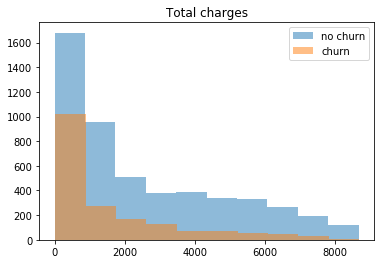

In [11]:
plt.hist(df[df['Churn']=='No']['TotalCharges'], alpha = 0.5)
plt.hist(df[df['Churn']=='Yes']['TotalCharges'], alpha = 0.5)
plt.title('Total charges')
plt.legend(['no churn', 'churn'])
plt.plot()

[]

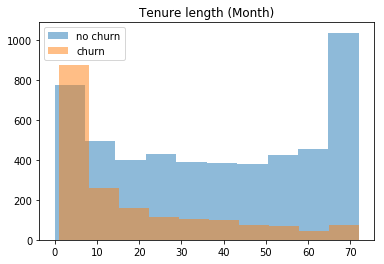

In [12]:
plt.hist(df[df['Churn']=='No']['tenure'], alpha = 0.5)
plt.hist(df[df['Churn']=='Yes']['tenure'], alpha = 0.5)
plt.title('Tenure length (Month)')
plt.legend(['no churn', 'churn'])
plt.plot()

[]

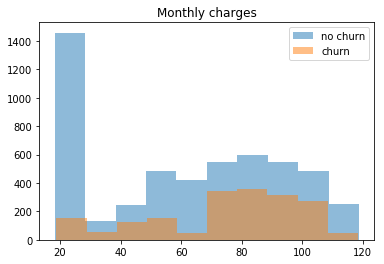

In [13]:
plt.hist(df[df['Churn']=='No']['MonthlyCharges'], alpha = 0.5)
plt.hist(df[df['Churn']=='Yes']['MonthlyCharges'], alpha = 0.5)
plt.title('Monthly charges')
plt.legend(['no churn', 'churn'])
plt.plot()

In [14]:
df_nochurn = df[df['Churn']=='No']
df_churn = df[df['Churn']=='Yes']

## Data preparation

In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### dummies

In [16]:
to_dummify = df.drop(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], axis=1)

In [17]:
dummies = pd.get_dummies(to_dummify)
dummies.columns

Index(['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_

In [18]:
dummies = dummies.drop(['gender_Male', 'Partner_No', 'Dependents_No', 'PhoneService_Yes', 'PaperlessBilling_No'], axis=1)
dummies.columns, dummies.shape

(Index(['gender_Female', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_No',
        'MultipleLines_No', 'MultipleLines_No phone service',
        'MultipleLines_Yes', 'InternetService_DSL',
        'InternetService_Fiber optic', 'InternetService_No',
        'OnlineSecurity_No', 'OnlineSecurity_No internet service',
        'OnlineSecurity_Yes', 'OnlineBackup_No',
        'OnlineBackup_No internet service', 'OnlineBackup_Yes',
        'DeviceProtection_No', 'DeviceProtection_No internet service',
        'DeviceProtection_Yes', 'TechSupport_No',
        'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
        'StreamingTV_No internet service', 'StreamingTV_Yes',
        'StreamingMovies_No', 'StreamingMovies_No internet service',
        'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
        'Contract_Two year', 'PaperlessBilling_Yes',
        'PaymentMethod_Bank transfer (automatic)',
        'PaymentMethod_Credit card (automatic)',
    

### scaling

In [19]:
to_scale = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
to_scale.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [20]:
# standard scaler
to_scale = (to_scale - to_scale.mean(axis=0))/(to_scale.std(axis=0))
to_scale.describe()

,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.043000e+03
mean,-1.614182e-17,-1.481516e-15,-1.646466e-15
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.318071e+00,-1.545750e+00,-1.005708e+00
25%,-9.516141e-01,-9.724708e-01,-8.298875e-01
50%,-1.372647e-01,1.857195e-01,-3.905005e-01
75%,9.213896e-01,8.337743e-01,6.647562e-01
max,1.613587e+00,1.794225e+00,2.825605e+00


### Concatenation

In [21]:
X = pd.concat([to_scale, dummies, df['SeniorCitizen']], axis=1)
X.shape

(7043, 40)

In [22]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
0,-1.277354,-1.160241,-0.992540,1,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0.066323,-0.259611,-0.172152,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,-1.236636,-0.362635,-0.957998,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,0.514215,-0.746482,-0.193659,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,-1.236636,0.197351,-0.938808,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [23]:
y = np.zeros(len(df))
y[df['Churn']=='Yes']=1
y[df['Churn']=='No']=0
y

array([0., 0., 1., ..., 0., 1., 0.])

In [24]:
np.sum(y), len(y), np.sum(y)/len(y)

(1869.0, 7043, 0.2653698707936959)

# Feature engineering

In [25]:
X.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_No', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Cr

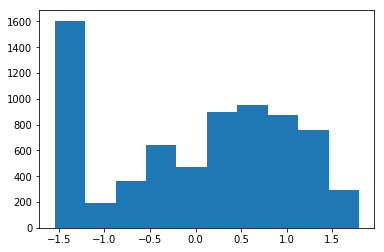

In [26]:
plt.hist(X['MonthlyCharges'])
plt.show()

In [27]:
X['low_tenure'] = X['tenure'] < -0.8
X['high_tenure'] = X['tenure'] > 1.2
X['low_charges'] = X['MonthlyCharges'] < -1.0

In [28]:
X['low_charges'].values

array([ True, False, False, ...,  True, False, False])

In [29]:
X.shape

(7043, 43)

## PCA

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)

pca.fit(X)
print('retained variance',np.sum(pca.explained_variance_ratio_))

X_pca = pca.transform(X)

retained variance 0.9905859018003457


In [31]:
pca.components_.shape

(22, 43)

## Split

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0, stratify=y)

# Basic Modeling

## Simple Logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score


## Define a function to print all the results for train and test for a given model
def print_metrics(model, X_train, y_train, X_test, y_test):
    print('Train dataset')
    print('-------------')
    print('accuracy', accuracy_score(y_train, model.predict(X_train)))
    print('precision', precision_score(y_train, model.predict(X_train)))
    print('recall', recall_score(y_train, model.predict(X_train)))
    print('F-score', f1_score(y_train, model.predict(X_train)))

    print('-------------')
    print('-------------')

    print('Test dataset')
    print('-------------')
    print('accuracy', accuracy_score(y_test, model.predict(X_test)))
    print('precision', precision_score(y_test, model.predict(X_test)))
    print('recall', recall_score(y_test, model.predict(X_test)))
    print('F-score', f1_score(y_test, model.predict(X_test)))   

In [35]:
print_metrics(lr, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.8029818956336529
precision 0.6627218934911243
recall 0.5244147157190635
F-score 0.585511575802838
-------------
-------------
Test dataset
-------------
accuracy 0.8090844570617459
precision 0.6744186046511628
recall 0.5427807486631016
F-score 0.6014814814814814


## Simple SVM

In [36]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [37]:
print_metrics(svm, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.8095491657791978
precision 0.7060546875
recall 0.4836120401337793
F-score 0.574037316395395
-------------
-------------
Test dataset
-------------
accuracy 0.801277501774308
precision 0.6793893129770993
recall 0.47593582887700536
F-score 0.559748427672956


## Simple Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
print_metrics(rf, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.979765708200213
precision 0.9832050384884534
recall 0.939799331103679
F-score 0.9610123119015048
-------------
-------------
Test dataset
-------------
accuracy 0.765791341376863
precision 0.5909090909090909
recall 0.38235294117647056
F-score 0.46428571428571425


## Simple Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [41]:
print_metrics(gb, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.8338658146964856
precision 0.7399141630901288
recall 0.5765886287625418
F-score 0.6481203007518797
-------------
-------------
Test dataset
-------------
accuracy 0.8034066713981547
precision 0.6655290102389079
recall 0.5213903743315508
F-score 0.5847076461769115


## Simple xGB

In [42]:
import xgboost as xgb

GBC = xgb.XGBClassifier()

GBC.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [43]:
print_metrics(GBC, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.8264110756123536
precision 0.7211291702309667
recall 0.5638795986622074
F-score 0.632882882882883
-------------
-------------
Test dataset
-------------
accuracy 0.8062455642299503
precision 0.6723549488054608
recall 0.5267379679144385
F-score 0.5907046476761618


# Hyperparameter optimization

## Random Forest

In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’, error_score=’raise-deprecating’, return_train_score=’warn’)

tuned_parameters = [{'max_depth': [5, 10, 20, 30, None], 'n_estimators': [10, 30, 50], 'criterion':['gini', 'entropy'],
                     'class_weight': ['balanced', 'balanced_subsample', None]}]

clf = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=0), tuned_parameters, cv=5, scoring='f1')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [5, 10, 20, 30, None], 'n_estimators': [10, 30, 50], 'criterion': ['gini', 'entropy'], 'class_weight': ['balanced', 'balanced_subsample', None]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [45]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [46]:
print_metrics(clf.best_estimator_, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.7699680511182109
precision 0.5456631482331344
recall 0.7953177257525084
F-score 0.6472509526401742
-------------
-------------
Test dataset
-------------
accuracy 0.7508871540099361
precision 0.5211009174311927
recall 0.7593582887700535
F-score 0.6180631120783461


## XGB

In [47]:
from sklearn.model_selection import GridSearchCV

#GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’, error_score=’raise-deprecating’, return_train_score=’warn’)

tuned_parameters = [{'max_depth': [10, 100, 1000], 'n_estimators': [10, 30, 100], 'learning_rate': [0.01, 0.1],
                     'subsample':[1, 0.9, 0.8]}]

clf = GridSearchCV(xgb.XGBClassifier(), tuned_parameters, cv=5, scoring='f1')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [10, 100, 1000], 'n_estimators': [10, 30, 100], 'learning_rate': [0.01, 0.1], 'subsample': [1, 0.9, 0.8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [48]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=30,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [49]:
print_metrics(clf.best_estimator_, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.9167554135605254
precision 0.9117174959871589
recall 0.7598662207357859
F-score 0.8288945640277271
-------------
-------------
Test dataset
-------------
accuracy 0.7835344215755855
precision 0.6138613861386139
recall 0.49732620320855614
F-score 0.5494830132939439


# Adding a SMOTE



In [50]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

## Simple Logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_res, y_res)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
print_metrics(lr, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.7541711040113596
precision 0.5242718446601942
recall 0.7946488294314381
F-score 0.6317468758308961
-------------
-------------
Test dataset
-------------
accuracy 0.7558552164655784
precision 0.5263157894736842
recall 0.8021390374331551
F-score 0.635593220338983


## Simple SVM

In [53]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_res, y_res)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [54]:
print_metrics(svm, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.7726304579339723
precision 0.5501405810684161
recall 0.7852842809364549
F-score 0.6470101956461836
-------------
-------------
Test dataset
-------------
accuracy 0.7679205110007097
precision 0.5452793834296724
recall 0.7566844919786097
F-score 0.6338185890257558


## Simple Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_res, y_res)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
print_metrics(rf, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.987220447284345
precision 0.9791245791245792
recall 0.9725752508361204
F-score 0.9758389261744966
-------------
-------------
Test dataset
-------------
accuracy 0.7629524485450674
precision 0.5613496932515337
recall 0.4893048128342246
F-score 0.5228571428571428


## Simple Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_res, y_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [58]:
print_metrics(gb, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.8061767838125665
precision 0.600498753117207
recall 0.8053511705685619
F-score 0.6880000000000001
-------------
-------------
Test dataset
-------------
accuracy 0.7743080198722498
precision 0.5571428571428572
recall 0.7299465240641712
F-score 0.6319444444444445


## Simple xGB

In [59]:
import xgboost as xgb

GBC = xgb.XGBClassifier()

GBC.fit(X_res, y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [61]:
print_metrics(GBC, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.8003194888178914
precision 0.5906862745098039
recall 0.8060200668896321
F-score 0.6817538896746818
-------------
-------------
Test dataset
-------------
accuracy 0.7764371894960965
precision 0.5588822355289421
recall 0.7486631016042781
F-score 0.64


## Vote majoritaire

In [71]:
y_pred_lr = lr.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_GBC = GBC.predict(X_test)
y_pred_gb = gb.predict(X_test)

In [72]:
y_pred_tot = np.mean([y_pred_lr, y_pred_svm, y_pred_GBC, y_pred_gb], axis=0)

In [73]:
y_pred_tot[y_pred_tot>0.5] = 1
y_pred_tot[y_pred_tot<=0.5] = 0

In [74]:
np.unique(y_pred_tot)

array([0., 1.])

In [75]:
print('Test dataset')
print('-------------')
print('accuracy', accuracy_score(y_test, y_pred_tot))
print('precision', precision_score(y_test, y_pred_tot))
print('recall', recall_score(y_test, y_pred_tot))
print('F-score', f1_score(y_test, y_pred_tot))

Test dataset
-------------
accuracy 0.7792760823278921
precision 0.5649484536082474
recall 0.732620320855615
F-score 0.6379511059371362


=> N'améliore pas le XGB seul

## Conclusions

* Meilleur score obtenu avec SMOTE et XGB : F-score = 0.64
* Amélioration possible avec optimisation des hyperparamètres du XGB